#Algoritmo de clasificación con **K-means** mediante la librería **sklearn**:

##Importación de datos:

Se importan las librerías requeridas.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Se importan también los datos junto con los datos ya procesados previamente y, estos últimos se convierten a tipo array:

In [12]:
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vRulJs5L9Ish3veRpqpV2MjcWZyakidXTkfM7fDP37p2Xfxo5OtNlNHlQhyY_auxQCJf0e84FuDF_f7/pub?output=csv'
datos = pd.read_csv(url)
datos

,Name,OVR,PAC,SHO,PAS,DRI,DEF,PHY,Acceleration,Sprint Speed,...,Nation,League,Team,play style,url,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes
0,Kylian Mbappé,91,97,90,80,92,36,78,97,97,...,France,LALIGA EA SPORTS,Real Madrid,"Quick Step+, Acrobatic, Finesse Shot, Flair, R...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
1,Rodri,91,66,80,86,84,87,85,65,66,...,Spain,Premier League,Manchester City,"Tiki Taka+, Aerial, Bruiser, Long Ball Pass, P...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
2,Erling Haaland,91,88,92,70,81,45,88,80,94,...,Norway,Premier League,Manchester City,"Acrobatic+, Bruiser, Power Header, Power Shot,...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
3,Jude Bellingham,90,80,87,83,88,78,83,81,80,...,England,LALIGA EA SPORTS,Real Madrid,"Relentless+, Flair, Intercept, Slide Tackle, T...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
4,Vini Jr.,90,95,84,81,91,29,69,95,95,...,Brazil,LALIGA EA SPORTS,Real Madrid,"Quick Step+, Chip Shot, Finesse Shot, First To...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17732,Araya Dennis,53,42,57,49,52,25,42,44,41,...,England,Barclays WSL,Spurs,NaN,https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
17733,Alexia Férnandez,53,53,55,51,53,34,47,52,53,...,Spain,Liga F,Granada CF,NaN,https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
17734,Aleigh Gambone,53,60,58,53,56,49,53,58,62,...,United States,Scottish Women's League,Glasgow City FC,NaN,https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
17735,Joy Lysser,53,61,52,48,56,53,58,60,62,...,Switzerland,Schweizer Damen Liga,FC Zürich,NaN,https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN


In [13]:
url_ = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vS7dPZu3VcPsEfmQ7vrhVc38TPipvQo0Ol9rElCa9AJyEGwMV18iDB2SPg71GOeB4fFY7krDf0ake9i/pub?output=csv'
X = pd.read_csv(url_)
X = X.values
X

array([[91., 97., 90., ...,  0.,  0.,  0.],
       [91., 66., 80., ...,  0.,  0.,  0.],
       [91., 88., 92., ...,  0.,  0.,  0.],
       ...,
       [53., 60., 58., ...,  0.,  0.,  0.],
       [53., 61., 52., ...,  0.,  0.,  0.],
       [53., 60., 49., ...,  0.,  0.,  0.]])

##Visualizacion de PCA

Con la librería sklearn se le asigna un cluster a cada jugador.

In [14]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4, random_state = 42)
cluster = kmeans.fit_predict(X)

Observemos un ejemplo de la asignación de los *clusters*:

In [15]:
datos['cluster'] = cluster
print(datos[['Name', 'cluster']].head())

              Name  cluster
0    Kylian Mbappé        0
1            Rodri        3
2   Erling Haaland        3
3  Jude Bellingham        3
4         Vini Jr.        0


Ahora bien, se crea un objeto PCA y se ajustan los datos y luego se especifica que se quiere las tres primeras componenetes principales.

In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_PCA = pca.fit_transform(X)

Para esta parte, se genera un gráfico de dipersion 2D usando las dos primeras 2 componentes:

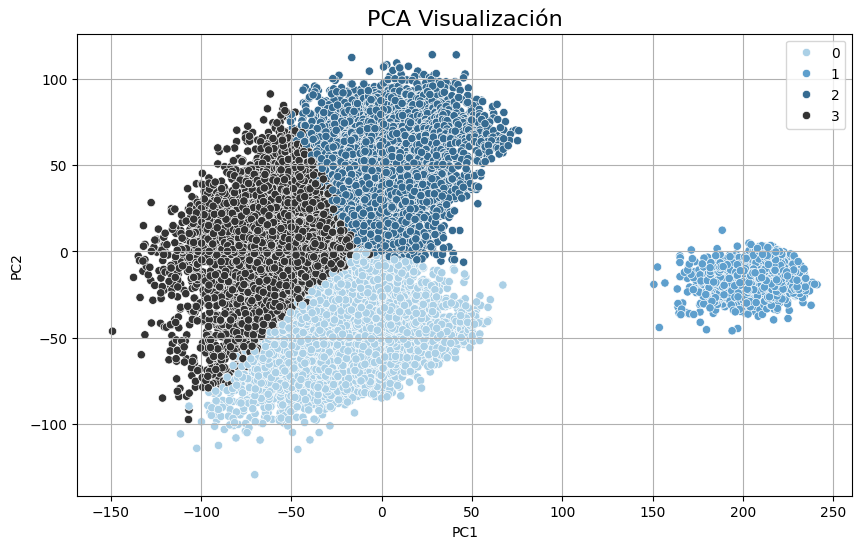

In [17]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=X_PCA[:,0], y=X_PCA[:,1], hue= cluster, palette='Blues_d')
plt.title('PCA Visualización', fontsize=16)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()

##K-means mediante la librería sklearn

###Método del codo:

Ahora, utilizando el método del codo (o agrupación) se podrá encontrar el número óptimo de *clusters* de los datos:

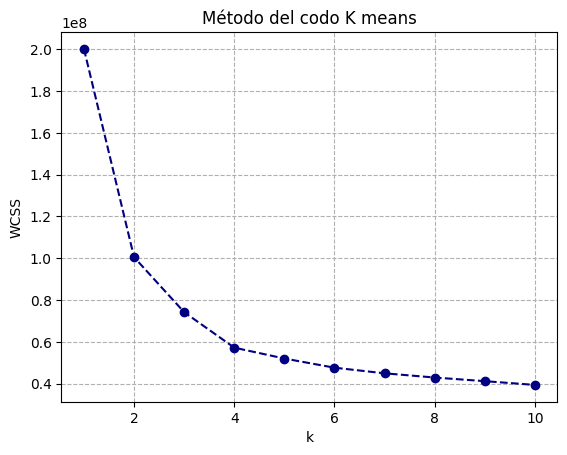

In [18]:
from sklearn.cluster import KMeans
# Se inicializa donde se almacena el WCCS(k)

WCSS = []

for k in range(1,11):
  kpp = KMeans(n_clusters= k,
               random_state=42, n_init = 'auto')
  kpp.fit(X)
  WCSS.append(kpp.inertia_)

plt.figure()
plt.plot(range(1,11), WCSS, 'o--', color = 'navy')
plt.title('Método del codo K means')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.grid(True)
plt.grid(linestyle = '--')
plt.show()

Por análisis de la gráfica, se obitne que el número óptimo de *clusters* es de 4.

###Implementación:

En este punto, le asignamos a una nueva variable la implementación del K-means con los parámetros del número de *clusters* y un valor fijo del random state:

In [19]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4, random_state = 42)
cluster_kmeans = kmeans.fit_predict(X)

Se generan los centroides, para después utilizarlos:

In [20]:
centroides_kmeans = kmeans.cluster_centers_
centroides_kmeans

array([[ 6.58039639e+01,  7.30671115e+01,  6.27686421e+01,
         5.75673077e+01,  6.65661303e+01,  3.32148744e+01,
         6.03475275e+01,  7.31840659e+01,  7.29531005e+01,
         6.43479199e+01,  6.40657378e+01,  6.51361852e+01,
         5.94497645e+01,  5.62496075e+01,  5.93618524e+01,
         5.92382261e+01,  5.41350078e+01,  4.98153454e+01,
         6.19599686e+01,  5.27468603e+01,  5.55781005e+01,
         6.64729199e+01,  7.11840659e+01,  6.95837912e+01,
         6.15011774e+01,  6.63779435e+01,  6.07388148e+01,
         2.95282575e+01,  5.47343014e+01,  3.09636970e+01,
         3.19097331e+01,  2.92580455e+01,  6.61291209e+01,
         6.34425039e+01,  6.21283359e+01,  5.04640895e+01,
         3.12715856e+00,  2.87519623e+00,  7.87284144e-01,
         2.47327316e+01,  1.58983937e-13,  9.32587341e-14,
         6.15507645e-13,  3.38395978e-13, -2.94875235e-13],
       [ 6.54262131e+01,  6.58829415e+01,  6.39144572e+01,
         6.30215108e+01,  6.67453727e+01,  3.58204102e+

Luego, creamos un objeto PCA ajustando los datos, del cual tomamos las tres primeras componentes principales:

In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_pca= pca.fit_transform(X)

In [22]:
centroides_kmeans_pca = pca.transform(centroides_kmeans)
centroides_kmeans_pca

array([[-18.92261285, -51.15290841, -19.91868549],
       [207.53624617, -14.95768587,  30.71744999],
       [  1.7006178 ,  51.9204732 , -17.30972911],
       [-57.46487019,   5.86526214,  22.12620196]])

La varianza nos indica el porcentaje de datos que se mantienen; aquí, aproximadamente un 80%.

In [23]:
varianza = pca.explained_variance_ratio_
print(sum(varianza))

0.8397093998660171


##Gráficas de K-means:

###Gráfica de K-means en dos dimensiones:

Se declara la función que realizará la gráfica de clasificación del K-means, usando las dos primeras componentes:

In [24]:
def graficar_clusters_PCA2D(clusters, metodo, centroids):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1],
                    hue=clusters, palette='crest',
                    alpha=0.6, s = 100)
    plt.scatter(centroids[:,0], centroids[:,1], c= 'black', s = 100, label = 'Centroides')
    plt.title(f'Visualización 2D de la Clusterización (PCA) {metodo}', fontsize=16)
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.grid(True)
    plt.grid(linestyle = '-', alpha  = 0.5)
    plt.legend(title='Cluster')
    plt.show()

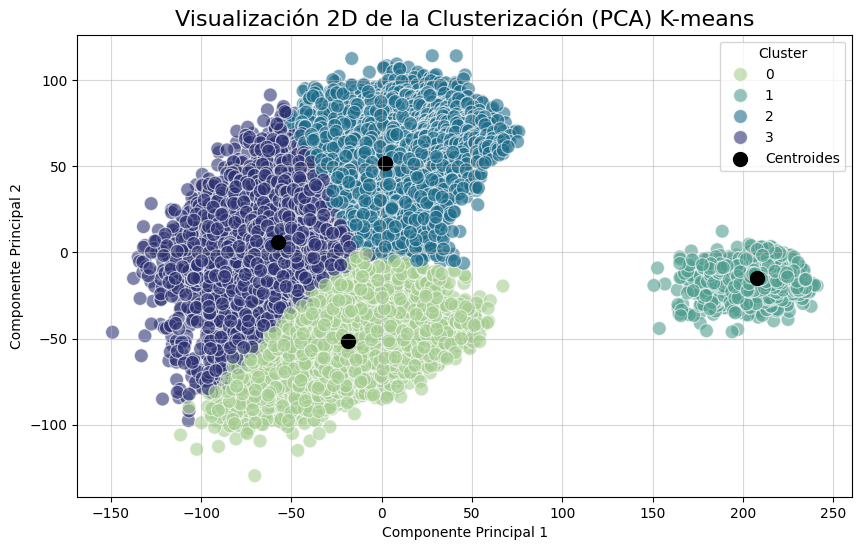

In [25]:
kmeans_2d = graficar_clusters_PCA2D(cluster_kmeans, 'K-means', centroides_kmeans_pca)

###Gráfica de K-means en tres dimensiones:

A partir de la librería mpl_toolkits, realizaremos la función que generará la gráfica de K-means en 3d.

In [26]:
from mpl_toolkits.mplot3d import Axes3D

def graficar_clusters_PCA3D(clusters, metodo):
    fig = plt.figure(figsize=(15,10))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2],
                       c=clusters, cmap='crest',
                       alpha=0.6)
    ax.set_xlabel('Componente Principal 1')
    ax.set_ylabel('Componente Principal 2')
    ax.set_zlabel('Componente Principal 3')

    legend1= ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Cluster")
    ax.add_artist(legend1)
    plt.title(f'Visualización 3D de la Clusterización (PCA) {metodo}', fontsize=16)
    plt.show()

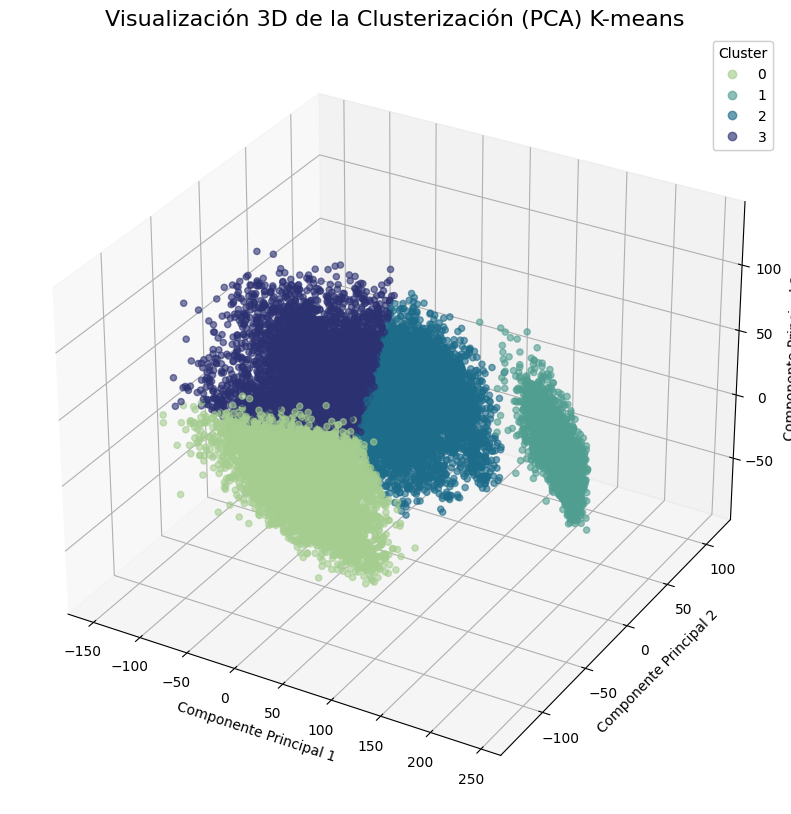

In [27]:
graficar_clusters_PCA3D(cluster_kmeans, 'K-means')